In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from pathlib import Path
path = Path('data')

In [2]:
import geopandas


countries = geopandas.read_file(
    f'zip://{path.joinpath("ne_110m_admin_0_countries.zip")}'
)

rivers = geopandas.read_file(
    f'zip://{path.joinpath("ne_50m_rivers_lake_centerlines.zip")}'
)

In [3]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,AGO,Angola,Africa,29310273.0,189000.0,(POLYGON ((23.90415368011818 -11.7222815894063...
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...


In [4]:
s = countries.iloc[0]["geometry"]

s.boundary.xy

(array('d', [61.210817091725744, 62.230651483005886, 62.98466230657661, 63.19353844590035, 63.98289594915871, 64.5464791197339, 64.7461051776774, 65.58894778835784, 65.74563073106683, 66.21738488145934, 66.51860680528867, 67.07578209825962, 67.82999962755952, 68.13556237170138, 68.85944583524594, 69.19627282092438, 69.51878543485796, 70.11657840361033, 70.27057417184014, 70.3763041523093, 70.80682050973289, 71.34813113799026, 71.23940392444817, 71.54191775908478, 71.44869347523024, 71.8446382994506, 72.1930408059624, 72.63688968291729, 73.26005577992501, 73.9486959166465, 74.98000247589542, 75.15802778514092, 74.57589277537298, 74.06755171091783, 72.92002485544447, 71.84629194528392, 71.26234826038575, 71.49876793812109, 71.61307620635071, 71.11501875192164, 71.15677330921346, 70.8818030129884, 69.9305432473596, 70.3235941913716, 69.68714725126486, 69.26252200712256, 69.31776411324256, 68.92667687365767, 68.55693200060932, 67.79268924344478, 67.68339358914747, 66.93889122911847, 66.381

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br><br>

What the type is of `ax` object here?
</div>

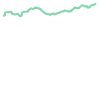

In [5]:
amazon = rivers[rivers['name'] == 'Amazonas'].geometry.squeeze()

amazon

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br><br>

What the type is of `amazon` object here?
</div>

In [6]:
countries[countries.crosses(amazon)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.625133429583 -30.21629485445423,..."
35,COL,Colombia,South America,47698524.0,688000.0,POLYGON ((-66.87632585312258 1.253360500489336...
124,PER,Peru,South America,31036656.0,410400.0,POLYGON ((-69.52967810736496 -10.9517343075021...


<div class="alert alert-info" style="font-size:80%">
<b>REFERENCE</b>: <br><br>

<ul>
  <li>`equals`</li>
  <li>`contains`</li>
  <li>`crosses`</li>
  <li>`disjoint`</li>
  <li>`intersects`</li>
  <li>`overlaps`</li>
  <li>`touches`</li>
  <li>`within`</li>
  <li>`covers`</li>
</ul>

<p>
See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.
<p></p>
See https://en.wikipedia.org/wiki/DE-9IM for all details on the semantics of those operations.
</p>
</div>

<div class="alert alert-success" style="font-size:120%">
<b>Exercise</b>: <br><br>

Does Brazil share a border with any European country?
</div>

In [7]:
# %load 04-geopandas-shapely-rasterio.py
br = countries[countries['name'] == 'Brazil'].geometry.squeeze()

intersec = countries[countries.intersects(br)]

intersec

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
4,ARG,Argentina,South America,44293293.0,879400.0,(POLYGON ((-66.95992000000001 -54.896810000000...
21,BOL,Bolivia,South America,11138234.0,78350.0,POLYGON ((-62.68505713565789 -22.2490292294223...
22,BRA,Brazil,South America,207353391.0,3081000.0,"POLYGON ((-57.625133429583 -30.21629485445423,..."
35,COL,Colombia,South America,47698524.0,688000.0,POLYGON ((-66.87632585312258 1.253360500489336...
55,FRA,France,Europe,67106161.0,2699000.0,(POLYGON ((2.513573032246114 51.14850617126189...
67,GUY,Guyana,South America,737718.0,6093.0,POLYGON ((-56.53938574891455 1.899522609866921...
124,PER,Peru,South America,31036656.0,410400.0,POLYGON ((-69.52967810736496 -10.9517343075021...
131,PRY,Paraguay,South America,6943739.0,64670.0,POLYGON ((-54.62529069682358 -25.7392554664155...
148,SUR,Suriname,South America,591919.0,8547.0,POLYGON ((-54.52475419779972 2.311848863123814...
167,URY,Uruguay,South America,3360148.0,73250.0,POLYGON ((-58.42707414410439 -33.9094544410575...


In [8]:
import folium


m = folium.Map()
for k, country in intersec.iterrows():
    gj = folium.GeoJson(country['geometry'])
    folium.Popup(country['name']).add_to(gj)
    gj.add_to(m)

m.fit_bounds(m.get_bounds())

In [9]:
m

### Rasterio

In [10]:
import rasterio
from rasterio import plot


fname = path.joinpath('world.rgb.tif')

world = rasterio.open(fname)

type(world)

rasterio.io.DatasetReader

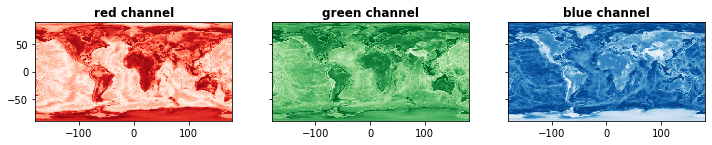

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((world, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((world, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((world, 3), ax=axb, cmap='Blues', title='blue channel');

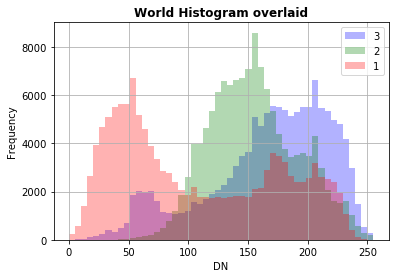

In [12]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title='World Histogram overlaid')

In [13]:
world.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 512,
 'height': 256,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.703125, 0.0, -180.0,
        0.0, -0.703125, 90.0)}

In [14]:
arr = world.read()

red = arr[0, ...]

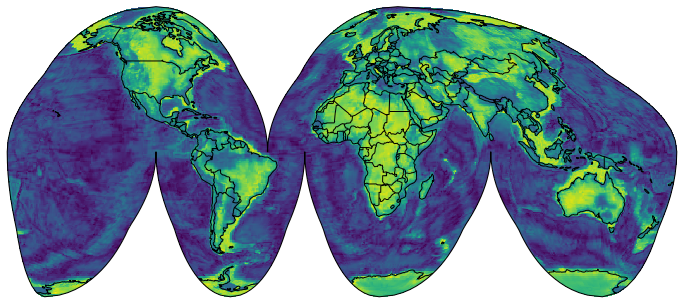

In [15]:
import cartopy
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    figsize=(12, 10),
    subplot_kw={'projection': ccrs.InterruptedGoodeHomolosine()})
ax.set_global()
ax.imshow(red, origin='upper', transform=ccrs.PlateCarree(),
          interpolation=None)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS);

# Packages that are worth checking out:

- gmt-python
- geoplot